# Part I - Ford GoBike System Data Exploration
## by Buluku Onome Joshua

## Introduction
This document explores a dataset containing information about individual rides made in a bike-sharing system encompassing the greater San Francisco Bay area.


## Preliminary Wrangling


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

%matplotlib inline

In [7]:
# load in the dataset into a pandas dataframe display it.
df_fordgo_bike = pd.read_csv("fordgobike-tripdata.csv")
df_fordgo_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [8]:
# high-level overview of df_fordgo_bike shape, dtypes and info()
print(df_fordgo_bike.shape)
print("....................................")
print(df_fordgo_bike.dtypes)
print("....................................")
print(df_fordgo_bike.info())

(183412, 16)
....................................
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
....................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         1

### Data cleaning to improve analyses.
Clean data is neccessary for better analyses. I will be dropping null values, formatting the columns into appropriate data type and employing some feature engineering to extract essential data. I will extract the hour, day of the week, and month from start_time so that this columns can also be visualized in the univarate analyses. In addition, will calculate the distance between the start and end station using the latitude and logitude columns and also extract age from the member_birth_year column and duration_min from the duration_sec column.

In [9]:
import math
#haversine distance is the angular distance between two points on the surface of a sphere
def distance(origin, destination):
 
    # Assign lat,log using a dictionary
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
 
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
 
    #Return haversine distance between two coordinate
    return d

In [10]:
# drop all null values from the dataset.
df_fordgo_bike = df_fordgo_bike.dropna(subset=['start_station_id'])
df_fordgo_bike = df_fordgo_bike.dropna(subset=['member_birth_year'])

In [11]:
#Change data type to appropriate types for analyses
df_fordgo_bike['start_station_id'] =   df_fordgo_bike.end_station_id.astype(int) 
df_fordgo_bike['start_time'] = pd.to_datetime(df_fordgo_bike['start_time'])
df_fordgo_bike['end_time'] =   pd.to_datetime(df_fordgo_bike['end_time'])
df_fordgo_bike['end_station_id'] =   df_fordgo_bike.end_station_id.astype(int) 
df_fordgo_bike['member_birth_year'] =   df_fordgo_bike.member_birth_year.astype(int) 
df_fordgo_bike['bike_share_for_all_trip'] =  df_fordgo_bike['bike_share_for_all_trip'].map({'Yes': True, 'No': False})
df_fordgo_bike['member_birth_year'] =   df_fordgo_bike.member_birth_year.astype(int) 

In [12]:
# Extracting additional columns from the start_time column in the Ford GoBike System dataset
df_fordgo_bike['time_hour'] =   df_fordgo_bike['start_time'].dt.hour
df_fordgo_bike['day_of_week'] =   df_fordgo_bike['start_time'].dt.day_name()
df_fordgo_bike['month_name'] =   df_fordgo_bike['start_time'].dt.month_name()
df_fordgo_bike['duration_sec'] =  df_fordgo_bike['duration_sec'] / 60 
df_fordgo_bike.rename(columns={'duration_sec': 'duration_min'}, inplace = True)
df_fordgo_bike['member_age'] =   date.today().year - df_fordgo_bike.member_birth_year 
df_fordgo_bike = df_fordgo_bike.replace( ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday'],['Mon','Tue','Wed','Thu','Fri', 'Sat','Sun'])

In [13]:
# convert day_of_week into ordered categorical types
ordinal_var_dict = {'day_of_week': ['Mon','Tue','Wed','Thu','Fri', 'Sat','Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_fordgo_bike[var] = df_fordgo_bike[var].astype(ordered_var)
    


In [14]:
# drop columns we might not use in the the analyses.
df_fordgo_bike = df_fordgo_bike.drop(['start_station_id','end_station_id','bike_id','end_time'], axis=1)

In [15]:
# Create empty list and tuple to store the distance and coordinates
dist_list = []
start_lat_log = ()
dest_lat_log = ()

# Iterate through the df_fordgo_bike dataframe to get the distance betwqeen two points
for i in df_fordgo_bike.index:
    start_lat_log = (df_fordgo_bike.start_station_latitude[i] , df_fordgo_bike.start_station_longitude[i] )
    dest_lat_log =  (df_fordgo_bike.end_station_latitude[i] , df_fordgo_bike.end_station_longitude[i] )
    # call the distance function to calculate the haversine distance btw the coordinates
    dist_list.append(distance(start_lat_log,dest_lat_log))

# add the new distance column to the df_fordgo_bike dataFrame
df_fordgo_bike['distance'] =  dist_list

In [16]:
# View sample of the data after clearning.
df_fordgo_bike.sample(5)

,duration_min,start_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,time_hour,day_of_week,month_name,member_age,distance
105389,2.116667,2019-02-14 06:53:51.985,5th St at Brannan St,37.776754,-122.399018,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,Subscriber,1994,Male,False,6,Thu,February,28,0.307112
2726,6.616667,2019-02-28 17:52:14.420,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,Subscriber,1957,Male,False,17,Thu,February,65,1.516848
108650,8.166667,2019-02-13 07:01:52.338,Union Square (Powell St at Post St),37.788300,-122.408531,Beale St at Harrison St,37.788059,-122.391865,Subscriber,1986,Male,False,7,Wed,February,36,1.464766
121049,14.450000,2019-02-11 16:06:30.484,Esprit Park,37.761634,-122.390648,Steuart St at Market St,37.794130,-122.394430,Subscriber,1985,Male,False,16,Mon,February,37,3.628615
165558,5.250000,2019-02-05 06:43:23.683,Howard St at Beale St,37.789756,-122.394643,2nd St at Townsend St,37.780526,-122.390288,Subscriber,1980,Male,False,6,Tue,February,42,1.095363


In [17]:
df_fordgo_bike.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_min               174952 non-null float64
start_time                 174952 non-null datetime64[ns]
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null bool
time_hour                  174952 non-null int64
day_of_week                174952 non-null category
month_name                 174952 non-null object
member_age                 174952 non-null int64
distance                   174952 non-null float64
dtypes: bool(1), category(1)

In [18]:
df_fordgo_bike.describe()

,duration_min,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,time_hour,member_age,distance
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733379,37.771220,-122.351760,37.771414,-122.351335,1984.803135,13.456165,37.196865,1.690049
std,27.370082,0.100391,0.117732,0.100295,0.117294,10.118731,4.734282,10.118731,1.096957
min,1.016667,37.317298,-122.453704,37.317298,-122.453704,1878.000000,0.000000,21.000000,0.000000
25%,5.383333,37.770407,-122.411901,37.770407,-122.411647,1980.000000,9.000000,30.000000,0.910443
50%,8.500000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,14.000000,35.000000,1.429829
75%,13.150000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,17.000000,42.000000,2.224010
max,1409.133333,37.880222,-121.874119,37.880222,-121.874119,2001.000000,23.000000,144.000000,69.469241


### What is the structure of your dataset?


The Ford GoBike System data contains 183,412 rows in the dataset with 16 features (`duration_sec`	`start_time`	`end_time`	`start_station_id`	`start_station_name`	`start_station_latitude`	`start_station_longitude`	`end_station_id	end_station_name`	`end_station_latitude`	`end_station_longitude`	`bike_id`	`user_type`	`member_birth_year`	`member_gender`, `member_age`,`bike_share_for_all_trip`, `hour`, `day_of_week`, `month`, `distance`). Most variables are numeric in nature, but we do have some categorical variables with user descriptions. After cleaning, we have a total of 174,952 rows and 9 columns. Five(5) additional columns ( `time_hour`, `day_of_week`, `month`, `distance`,`member_age`) were added through feasture engineering of the start_time column and the latitude/longitude columns. This entails extracting essential data and using a formula to get the distance between two point from latitude and logitude columns. The member_birth_year columns was also calculated to get the age of the riders.

### What is/are the main feature(s) of interest in your dataset?

- I would like to explore what features in the dataset correlate with the distance travelled by members.
- I'm also interested in knowing which user type and age group spend more time in the Ford GoBike System and travel more distance.
- Would also check which day of the week has more trips in the dataset and what is the peak time in the data set.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 - I expect that member_age will have a strong effect on the distance travelled by members.
 - I would expect day of the week to have a major effect on the number of trips taken by members and distance travelled.
 - I also expect that the user_type and time_hour will play a role to determine who spend more time in the shared bike system.




## Univariate Exploration

**I'll start by looking at the distribution of the distance variable in the dataset, follow by member_age.**


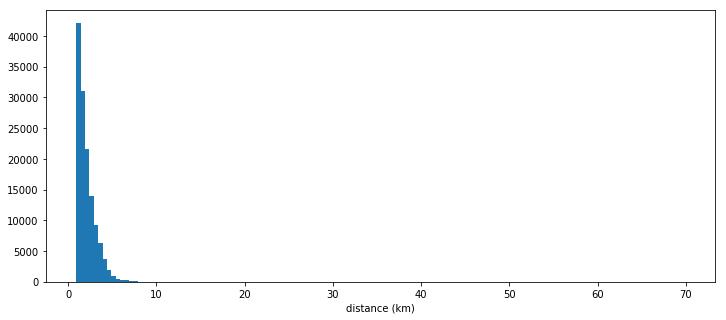

In [19]:
# starting with a standard-scaled plot
binsize = 0.5
bins = np.arange(0.9, df_fordgo_bike['distance'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_fordgo_bike, x = 'distance', bins = bins)
plt.xlabel('distance (km)')

plt.show()

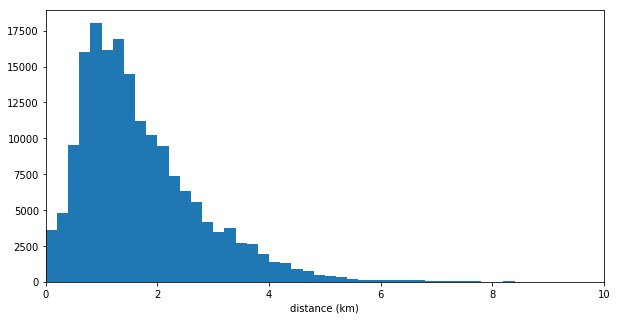

In [20]:
# let reduce the bins size to drill down to the values with xlim set between 0 to 10km
binsize = 0.2
bins = np.arange(0.0, df_fordgo_bike['distance'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_fordgo_bike, x = 'distance', bins = bins)
plt.xlabel('distance (km)')
plt.xlim(0,10)
plt.show()

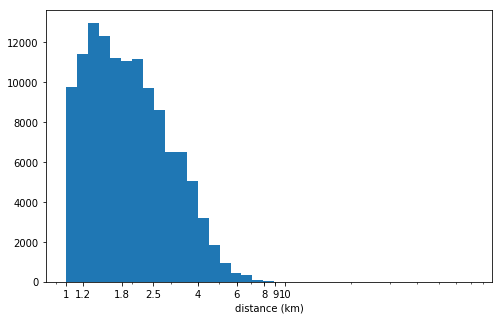

In [21]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_fordgo_bike['distance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_fordgo_bike, x = 'distance', bins = bins)
plt.xscale('log')
plt.xticks([0.1e1,0.12e1,0.18e1,0.25e1,0.4e1,0.6e1, 0.8e1,0.9e1,1e1], [1,1.2,1.8,2.5,4,6,8,9,10])
plt.xlabel('distance (km)')
plt.show()

The distance variable has a long-tailed distribution, with a lot of values on the low distance end, and very few before the 10km mark on the x axis but seems to have an outlier when the maximum bin size is considered in the histogram. When plotted with a different bin size with x limit between 0 t0 10 on the x axis, the distance variales are skewed to the right with a long tail. And lastly, When plotted on a log-scale, the distance distribution looks slightly stewed to the right, with peak between 1.1 and 1.8. Amazingly, there's a smooth drop in the distance between 4 to 10 km on the x axis.

**Next up, the member_age variable in the dataset and it is distributed**

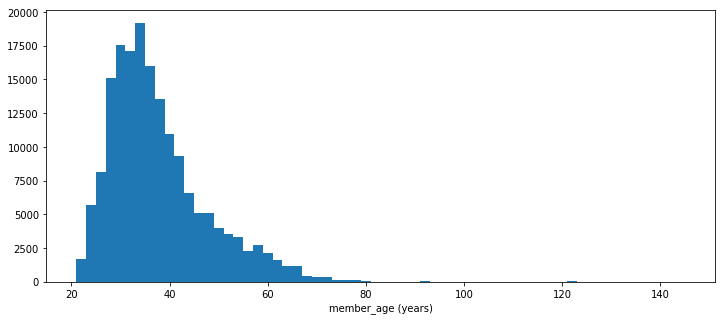

In [22]:
# starting with a standard-scaled plot
binsize = 2
bins = np.arange(21, df_fordgo_bike['member_age'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_fordgo_bike, x = 'member_age', bins = bins)
plt.xlabel('member_age (years)')

plt.show()

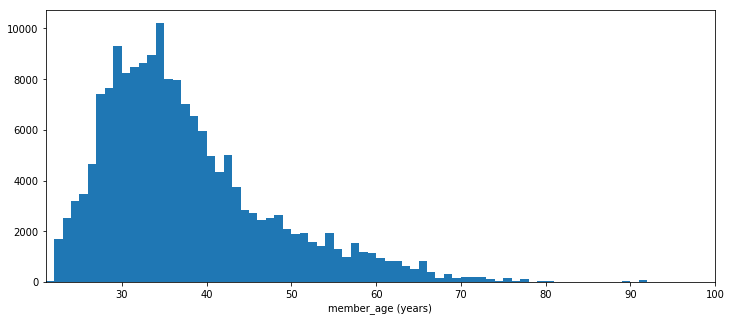

In [23]:
# let reduce the bins size to drill down to the values with xlim set between 21 to 100
binsize = 1
bins = np.arange(21, df_fordgo_bike['member_age'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_fordgo_bike, x = 'member_age', bins = bins)
plt.xlabel('member_age (years)')
plt.xlim(21,100)
plt.show()

Member age has a distribution that some how looks that of the distance, The distribution is skewed to the right, with the mean member age around 37 in the data set. Also, we have few members around the age of 70 to 100 with 140 being an outlier.  Although we have small values on the lower end. and very few before the 100 year on the x axis. When plotted with a different bin size and with x limit between 21 to 100 on the x axis, the member age variales are skewed to the right with a long tail with peak between 21 and 38 years. Amazingly, the frequency quickly trails to the right on the x axis.

**We will look at the duration_min variable in the dataset distribution.**

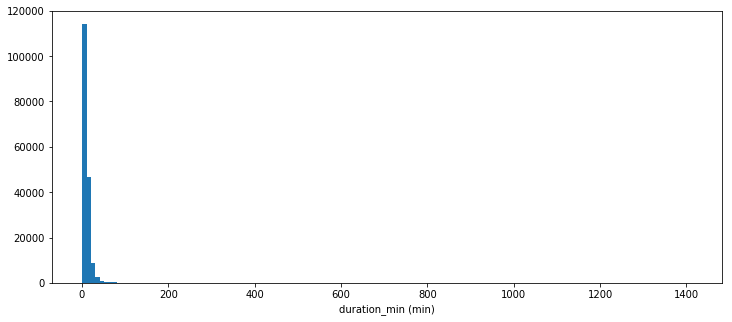

In [24]:
# starting with a standard-scaled plot
binsize = 10
bins = np.arange(1, df_fordgo_bike['duration_min'].max()+binsize, binsize)
plt.figure(figsize=[12, 5])
plt.hist(data = df_fordgo_bike, x = 'duration_min', bins = bins)
plt.xlabel('duration_min (min)')

plt.show()

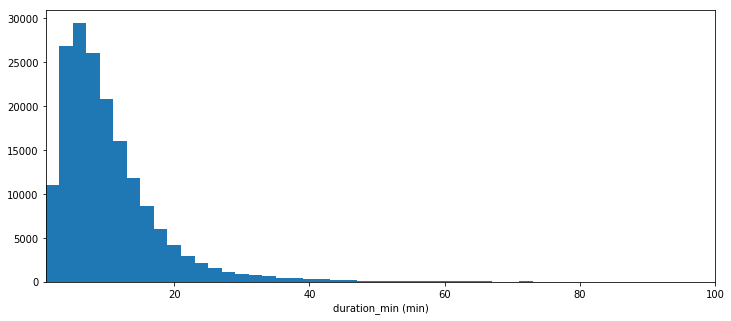

In [25]:
# starting with a standard-scaled plot
binsize = 2
bins = np.arange(1, df_fordgo_bike['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_fordgo_bike, x = 'duration_min', bins = bins)
plt.xlim(1,100)
plt.xlabel('duration_min (min)')

plt.show()

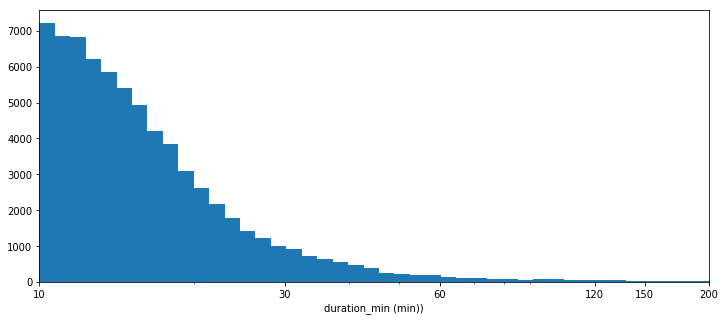

In [26]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.03
bins = 10 ** np.arange(1, np.log10(df_fordgo_bike['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_fordgo_bike, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1e1,3e1,6e1,9e2,12e1,15e1,2e2,4e2,6e2,8e2,1e3], [10,30,60,90,120,150,200,400,600,800,1000])
plt.xlim(10,200)
#plt.xticks(rotation = 45)
plt.xlabel('duration_min (min))')
plt.show()

The duration_min has a distribution that some how looks like that of the distance. The distribution is skewed to the right, with the mean duration_min around 11-12 min in the data set. Although we have small values on the lower end and very few before the 100 minutes on the x axis when plotted with a different bin size and with x limit between 1 to 100. Due to this long tail on the x axis, when plotted on a log scale, we have a few duration around 60 to 200 minutes with some outliers.

Next up, we will look at the removing the outliers from the dataset.

The first three (distance, member_age, and duration_min) histogram plots of these columns show some important points of concern in their distribution. The plot of the distance, member_age, and duration_min have most of their data at the far right of their axis, suggesting some possible existence of  outliers on the right. The left limits of the distance means that there are some points that have 0 as their distance in kilometer travelled. It's importance to investigate and remove this outliers from the data if need be.

In [27]:
# select low outliers, using criteria eyeballed from the plots
low_outliers = ((df_fordgo_bike['distance'] < 0.1))
low_outliers.sum()
print(df_fordgo_bike.loc[low_outliers,:])

        duration_min              start_time  \
19         14.566667 2019-02-28 23:43:05.183   
27          6.800000 2019-02-28 23:48:08.282   
34          7.850000 2019-02-28 23:42:43.361   
55         57.966667 2019-02-28 22:39:35.020   
56         52.333333 2019-02-28 22:44:53.503   
59          7.033333 2019-02-28 23:28:50.464   
60          6.683333 2019-02-28 23:28:53.508   
72          1.883333 2019-02-28 23:26:28.335   
74          6.183333 2019-02-28 23:21:37.878   
75         50.016667 2019-02-28 22:37:41.470   
76         49.550000 2019-02-28 22:38:07.495   
97          8.283333 2019-02-28 23:04:52.183   
204        56.883333 2019-02-28 21:38:01.453   
205        57.116667 2019-02-28 21:37:46.214   
235         6.800000 2019-02-28 22:18:53.375   
251         1.383333 2019-02-28 22:16:36.506   
264         1.733333 2019-02-28 22:13:24.613   
297       217.683333 2019-02-28 18:28:18.728   
336        13.366667 2019-02-28 21:41:22.424   
387        26.466667 2019-02-28 21:17:18

In [28]:
# get low outliers, using criteria seen from the plots
high_outliers = ( (df_fordgo_bike['duration_min'] > 150) | (df_fordgo_bike['member_age'] > 120) | (df_fordgo_bike['distance'] > 10))

In [29]:
# Print outlier sum and datafram
print(high_outliers.sum())
print(df_fordgo_bike.loc[high_outliers,:])

466
        duration_min              start_time  \
0         869.750000 2019-02-28 17:32:10.145   
2        1030.900000 2019-02-28 12:13:13.218   
3         608.166667 2019-02-28 17:54:26.010   
199       252.050000 2019-02-28 18:23:19.035   
297       217.683333 2019-02-28 18:28:18.728   
779       603.166667 2019-02-28 10:30:03.377   
813       166.566667 2019-02-28 17:41:05.362   
939       280.066667 2019-02-28 15:30:33.480   
945       279.466667 2019-02-28 15:30:32.430   
1285        2.466667 2019-02-28 19:29:17.627   
1826      152.900000 2019-02-28 16:14:40.336   
2188      157.066667 2019-02-28 15:50:03.285   
2298      335.933333 2019-02-28 12:44:12.902   
2544      527.216667 2019-02-28 09:20:43.087   
2588      511.100000 2019-02-28 09:35:13.840   
2693      364.716667 2019-02-28 11:56:08.063   
3401     1040.866667 2019-02-28 00:04:01.344   
3530      230.733333 2019-02-28 13:27:32.213   
4223      157.866667 2019-02-28 13:45:40.233   
4233      449.800000 2019-02-28 08:5

In [30]:
# remove points with lower and higher outliers.
df_fordgo_bike = df_fordgo_bike.loc[-low_outliers & -high_outliers,:]

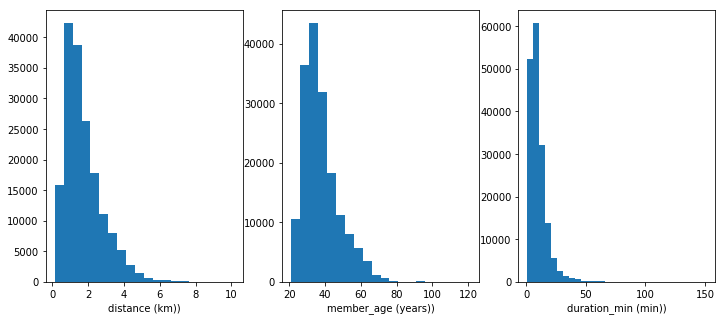

In [31]:
# first plot: hist plot hist plot
plt.figure(figsize = [12, 5])
binsize = 0.5
bins = np.arange(df_fordgo_bike['distance'].min(), df_fordgo_bike['distance'].max()+binsize, binsize)
plt.subplot(1, 3, 1)
plt.hist(data = df_fordgo_bike, x = 'distance', bins = bins)
plt.xlabel('distance (km))')

# center plot: hist plot
binsize = 5
bins = np.arange(df_fordgo_bike['member_age'].min(), df_fordgo_bike['member_age'].max()+binsize, binsize)
plt.subplot(1, 3, 2)
plt.hist(data = df_fordgo_bike, x = 'member_age', bins = bins)
plt.xlabel('member_age (years))')

# right plot:  hist plot
binsize = 5
bins = np.arange(df_fordgo_bike['duration_min'].min(), df_fordgo_bike['duration_min'].max()+binsize, binsize)
plt.subplot(1, 3, 3)
plt.hist(data = df_fordgo_bike, x = 'duration_min', bins = bins);
plt.xlabel('duration_min (min))');


Amazingly, the shape of the distance, member_age, and duration_min distributions look very similar to one another. Although duration_min distribution looks a little bit different since its values are mostly around 0 to 50 min with a few values at the far right. It's obvious that the duration variable will be highly correlated with the member_age, and probably have a strong correlation with distance.

**Let's look at the time_hour variable and visualized the shape.**

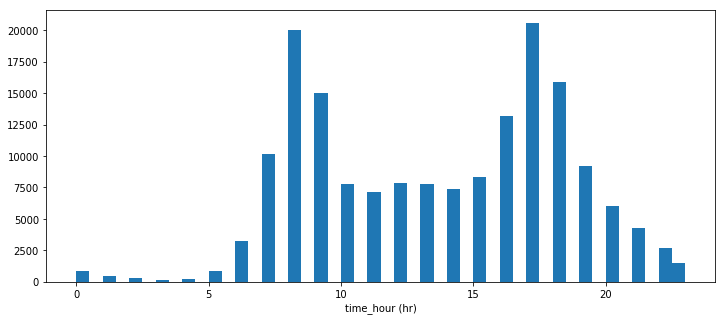

In [32]:
# starting with a standard-scaled plot
binsize = 0.5
bins = np.arange(0, df_fordgo_bike['time_hour'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_fordgo_bike, x = 'time_hour', bins = bins)
plt.xlabel('time_hour (hr)')

plt.show()

The histogram of time_hour has a long-tailed distribution on the left with few of the data on the early hours left end. Looking at the plot, the time_hour distribution looks roughly bimodal, with one peak between 7am and 9am, and a second peak between  4pm and 6pm. Interestingly, there's a smooth ramp up in the time_hour data at the far right.

**Next up, we will look at the day_of_week variable in the dataset. Which day most bikes are taken for ride?**

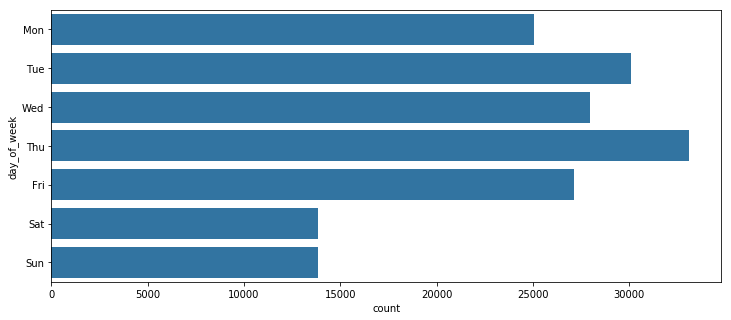

In [33]:
# let's plot day_of_week ordinal variables to get an idea of distribution.

plt.figure(figsize=[12, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = df_fordgo_bike, y = 'day_of_week', color = default_color)

plt.show()

The plot above shows the count of the day_of_week in the dataset representing the day of the week when bike are hired from  one station to station. We can see from the plot that Thurdays and Tuesdays, happens to be the most days of the week when most rides are made. It is also obvious that Saturdays and Sunday have lesser numbers of ride by users and approximately the same number of rides for both days.

**Next up, we will look at the user_type and member_gender variable in the dataset. Which user_type has most ride and which gender is most common?**

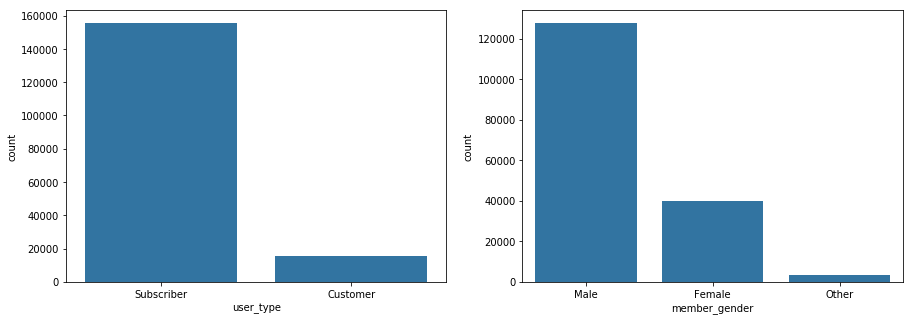

In [34]:
#let's plot two categorical variables (user_type and member_gender) side by side together to get an idea of each variable's distribution.
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
sb.countplot(data = df_fordgo_bike, x = 'user_type', color = default_color)

plt.subplot(1, 2, 2)
sb.countplot(data = df_fordgo_bike, x = 'member_gender', color = default_color)
plt.show()

The user_type variable in the Ford GoBike System dataset has a higher number of users who are subscribers than regular customer/"casual" riders. Interestingly, most of the riders are male, taking up to 3x the numbers of female. In addition,  members whose gender were not specified in the dataset was very low with about 1500-2000 of genders not specified. The bar chart shows that users who are subscribe riders are around 80-90% compare to ordinary customers in the dataset.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distance variable took on a very large range of values with some outliers, The log transformation was used to look at the  distrubution of the data further. Using a log transform, the data looked skewed to the right, with peak between 1.2 and 1.8.
The same outliers were seen in the member_age and also duration_min variables and the log transform was used to tranform the data for further visualization. The only variable that looks different was the time_hour variable, this was a bimodal distribution with two peaks somewhere around 7am and 9am, and 4pm and 6pm repectively.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the distance, member_age, and duration_age variables, a number of outlier points were identified. some of this point does not look valid expencially with distance of 0.0km. I removed the lower outlier points and also the higher outlier points from the dataset to explore the data further.

## Bivariate Exploration

**To start off with, I want to look at the pairwise correlations present between features in the data.**

In [35]:
numeric_vars = ['duration_min', 'member_age', 'time_hour', 'distance']
categoric_vars = ['user_type', 'day_of_week', 'member_gender']

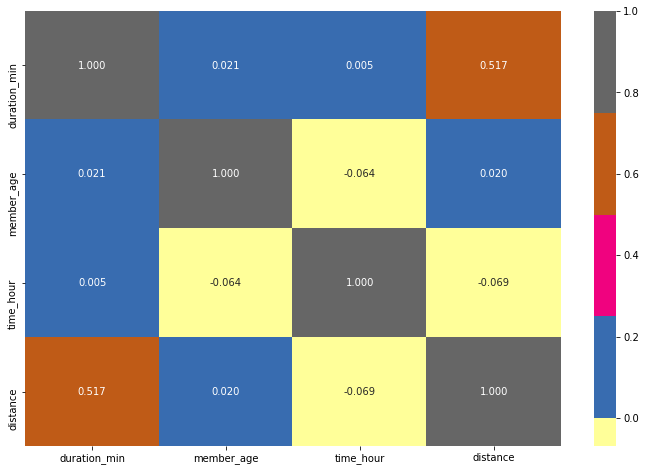

In [36]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(df_fordgo_bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'Accent', center = 0)
plt.show();

df_fordgo_bike.shape= (171075, 17)
df_fordgo_bike.shape= (5000, 17)


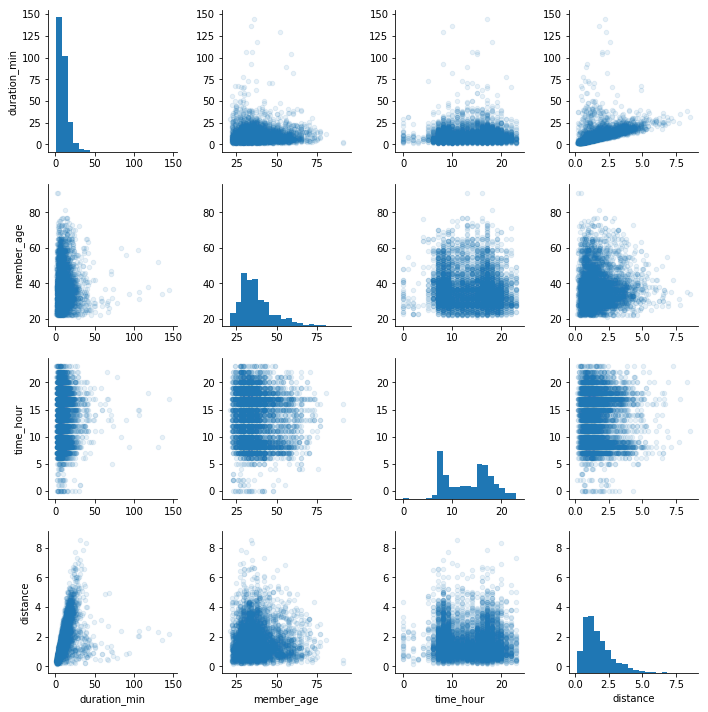

In [37]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("df_fordgo_bike.shape=",df_fordgo_bike.shape)
df_fordgo_bike_samp = df_fordgo_bike.sample(n=5000, replace = False)
print("df_fordgo_bike.shape=",df_fordgo_bike_samp.shape)
size = [20]

g = sb.PairGrid(data = df_fordgo_bike_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, s=size, alpha = 2/20)

The 'distance', 'duration_min', and 'member_age' dimensions are all highly correlated with one another, this is expected.
Since distance travelled in the shared bike system can be influeced by the duration_min, it is no surprising that it is highly and most correlated among other variables. Surprisingly, there exist some positive correlation between distance and member_age, as this can been seen from correlation plot, using heatmap plot. 

The duration_min just like distance value also has a positive correlation with member_age. Although we can as well see a negative correlation between time_hour and member_age variable. I would perform further analyses with the positive and negative correlation variables as they'll be of much further interest.

**Let's move on to looking at how distance, member_age, and duration_min, time_hour correlate with the categorical variables.**

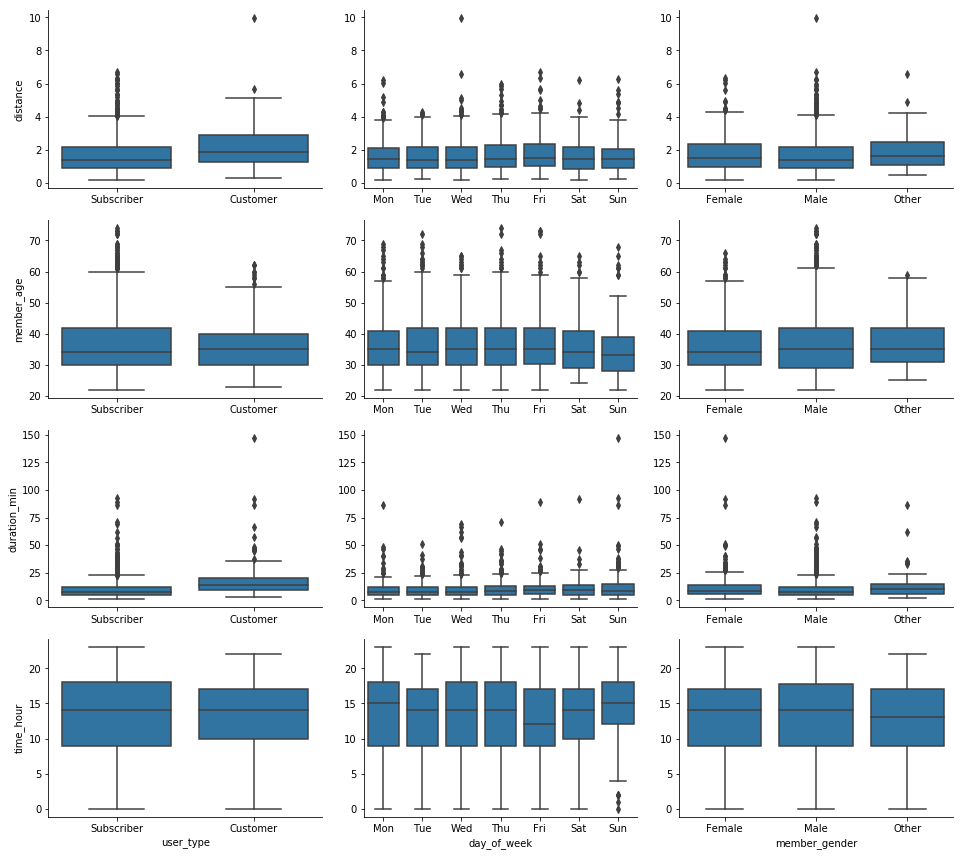

In [76]:

df_fordgo_bike_samp = df_fordgo_bike.sample(n=2000, replace = False)

def boxgrid(x, y, **kwargs):
    """ Quick waw for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])

g = sb.PairGrid(data = df_fordgo_bike_samp, y_vars = ['distance', 'member_age','duration_min','time_hour'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)

plt.show();

From the pairgrid plot above, there appears to be some sort of negative relationships between the categorical variables and the two numeric variables of interest. The user_type that are subscriber have higher mean age and spend more time in the shared bike system but interestingly, the subscriber user_type, travel lesser distance. This will be worth investigating more later on, using the full data.

**Finally, let's look at relationships between the three categorical features.**

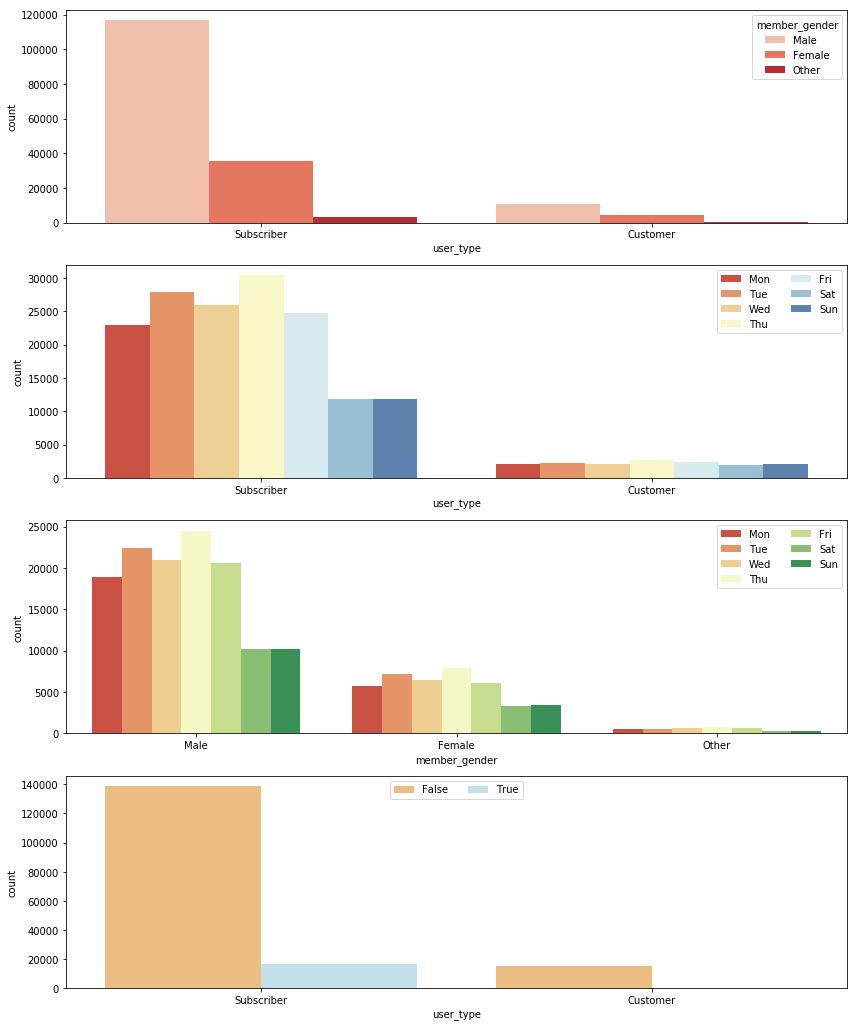

In [39]:
# using the full data to plot 4 categorical variables
plt.figure(figsize = [14, 18])

# subplot 1: user_type vs member_gender
plt.subplot(4, 1, 1)
sb.countplot(data = df_fordgo_bike, x = 'user_type', hue = 'member_gender', palette = 'Reds')

# subplot 2: user_type vs. day_of_week
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_fordgo_bike, x = 'user_type', hue = 'day_of_week', palette = 'RdYlBu')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: member_gender vs. day_of_week, use different color palette
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df_fordgo_bike, x = 'member_gender', hue = 'day_of_week', palette = 'RdYlGn')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 2: user_type vs. bike_share_for_all_trip
ax = plt.subplot(4, 1, 4)
sb.countplot(data = df_fordgo_bike, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'RdYlBu')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show()

There is larger more male interactions on the `member_type` and `member_gender`. It is clear form the plot above that there are more Male than Female members in both the `user_type` and `member_gender`. Also, we could see that thursdays happens to be the day of the week with the highest number of users who take on ride. In addition, no customer was seen enrolled in the share bike system for all program for low-income residents except for customer who are subscriber in the system.

**Haven't look at the bivariate relationships, Let's dig into some of the relationships more. First, I want to see how distance and member_age are related to one another for all of the data, using both scatter plot and headmap to visualisation.**

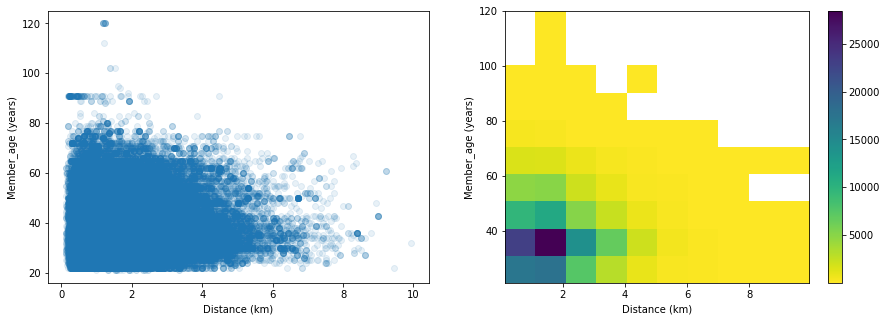

In [40]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
plt.scatter(data = df_fordgo_bike, x = 'distance', y = 'member_age', alpha = 1/10)
plt.xlabel('Distance (km)')
plt.ylabel('Member_age (years)');

plt.subplot(1, 2, 2)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = df_fordgo_bike, x = 'distance', y = 'member_age', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Distance (km)')
plt.ylabel('Member_age (years)');

The plot of the full data using a scatter plot and a heatmap reveals the relationship to exist between this variables in the dataset. It is highly seen that, an increase in distance, leads to a some increase in the ages of the members. We could see from the heatmap that, majority of the members are around 30 to 40 years and travel between 1 to 2 km on average. This means that a few older people tends to travel more distance with the exception of some points which appears to be outliers. 

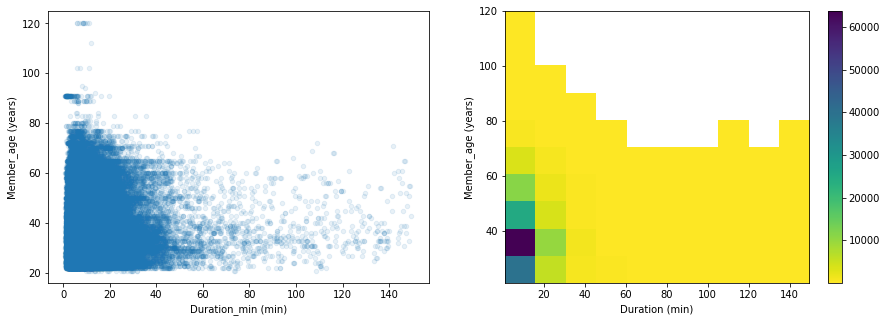

In [41]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
size=[20]
plt.scatter(data = df_fordgo_bike, x = 'duration_min', y = 'member_age', s=size, alpha = 1/10)
plt.xlabel('Duration_min (min)')
plt.ylabel('Member_age (years)');
plt.subplot(1, 2, 2)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = df_fordgo_bike, x = 'duration_min', y = 'member_age', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Duration (min)')
plt.ylabel('Member_age (years)');

The plots above look similar to that of the distance and memeber_age relationship. This is expected as one could say, longer distance means longer travel time. It is obvious in the plot that only fewer people could travel more than 60 minutes. An increase in member age, increase the duration_min value in the heatmap. Fewer members around age 70, travel longer distance than young members. This means that older people tends to spend more time compare to younger age.

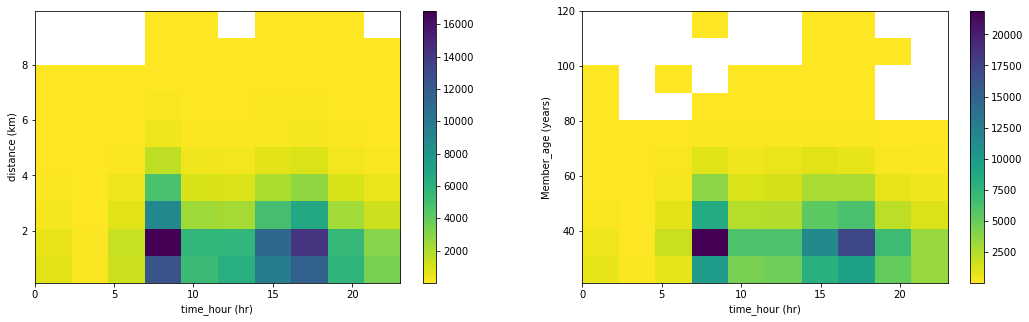

In [42]:
plt.figure(figsize = [18, 5])
plt.subplot(1, 2, 1)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = df_fordgo_bike, x = 'time_hour', y = 'distance', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('time_hour (hr)')
plt.ylabel('distance (km)');

plt.subplot(1, 2, 2)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = df_fordgo_bike, x = 'time_hour', y = 'member_age', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('time_hour (hr)')
plt.ylabel('Member_age (years)');

The two heat maps above, represent the plot of the distance and member_age against time_hour. Both plot look similar on the full dataset. They reveal the peak time of the day when a lot of trips were made.  Much more can be seen looking at the heatmap. About the hour of 7am - 8am, and 4pm - 6pm happens to be the peak time where member around the ages of 30 to 40 years travel 1 to 2 km distance. It will be interesting to see how this relationships plays out in the multivariate analysis.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Member_age had a slight correlation with the distance traveled, The scatterplot and heatmap that was observerd, suggested that there was some sort of distance convered by older people in the shared bike system but majority of the shorter distance where made by younger riders. This similarity was observed when member_age was plotted against the duration_min varaible.
There was also an interesting relationship observed between distance, member_age and the time_hour features.

About the hour of 7am - 8am, and 4pm - 6pm happens to be the peak time where member around the ages of 30 to 40 years travel 1 to 2 km distance. This was observed that a few older people around 70 and above, do not observe this peak hours and member above 100 years do not travel during the early hours.
This will have to be explored further in the next section.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Other relationships found in the association between the 'member_gender', 'user_type', and 'bike_share_for_all_trip', 'day_of_week' measurements in Ford GoBike System. There was also a small interaction in the categorical quality features. subscriber members, travel most on thursday same applies to regular customers. This same relationship is seen in the female, male and other gender.

Also, no customer was seen enrolled in the share bike system for all program for low-income residents except for customer who are subscriber in the system.

## Multivariate Exploration


**I would to explore how `member_gender`, `user_type`, `time_hour`, and `bike_share_for_all_trip` play into the relationship between distance and member_age in the multivariate analyses.**

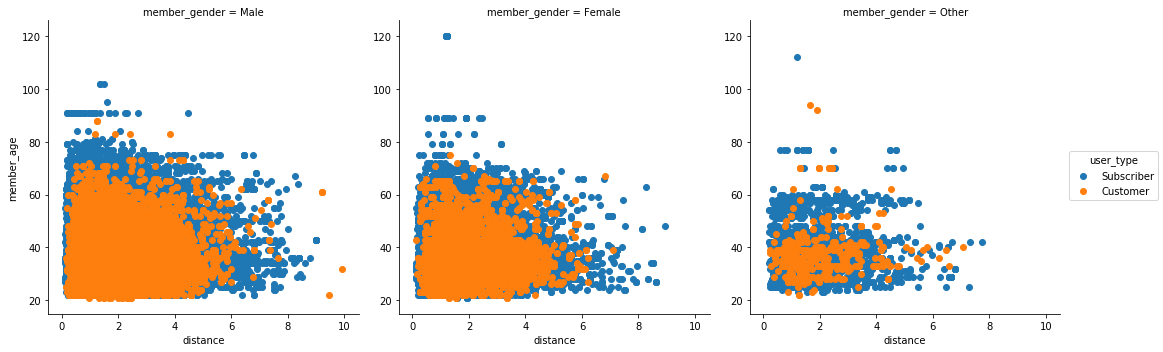

In [43]:
g = sb.FacetGrid(data = df_fordgo_bike, hue = 'user_type', col='member_gender', size = 5)
g.map(plt.scatter, 'distance', 'member_age')
g.add_legend()

In each of the faceted scatter plot, you can see how the `user_type` relates with the `distance` and `member_age` variables. The subscriber user type in the dataset happens to dominate the shared bike system data and even when the data is further visualized by `memeber_gender`. We can see that as the distance increases, the 'member_age' points moves towards the upper right of the plot, thus showing increased in member_age. This is very obvious when we look at the "Other" category in the `member_gender` variable.
This visualization helped me to answer the question posted regarding the features to explore, which is "knowing which `user type` and what age group spend more time in the Ford GoBike System and travel more distance".


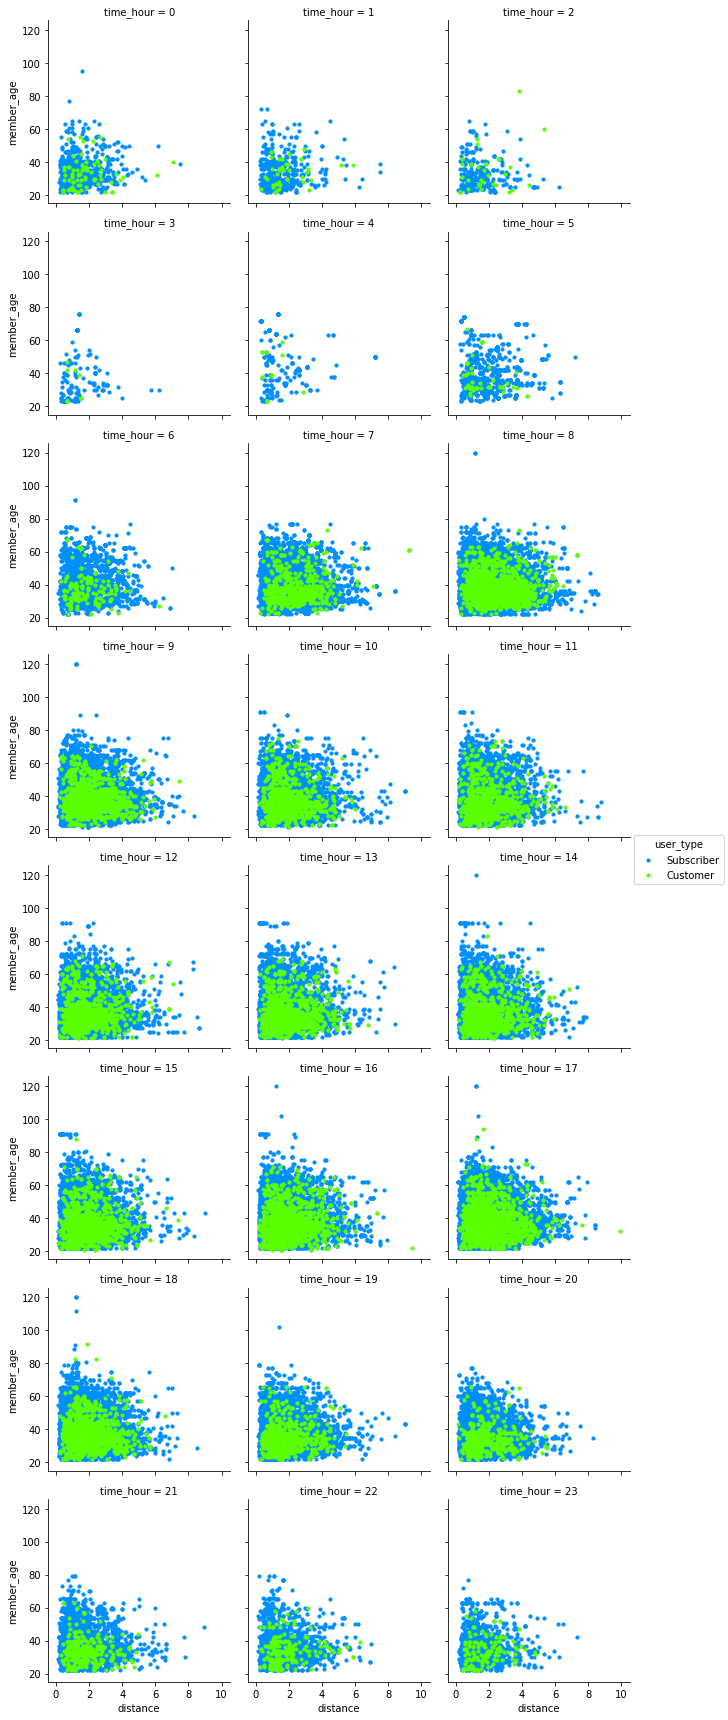

In [105]:
size =[10]
g = sb.FacetGrid(data = df_fordgo_bike,col = 'time_hour', hue = 'user_type', size =3, col_wrap=3,  palette='gist_rainbow_r')
g.map(plt.scatter, 'distance', 'member_age',s=size)
g.add_legend()

As, seen, In each of the faceted scatter plot, we visualized how the `user_type` relates with the `distance` and `member_age` by `time_hour` variables. The plots show that although for both user_type whether subscribe or customer, do take on ride during all hours, but we can also see that for the customer user type, their interation with the system decreases during the early hours and the late hours as seen from the plots. In addition, the customer user type tends to cover lesser distance during this time. We can also see more interraction of both user types ( ) during 8am to 5pm in contrast to the early hours. This is seen in both `user_type` variable.

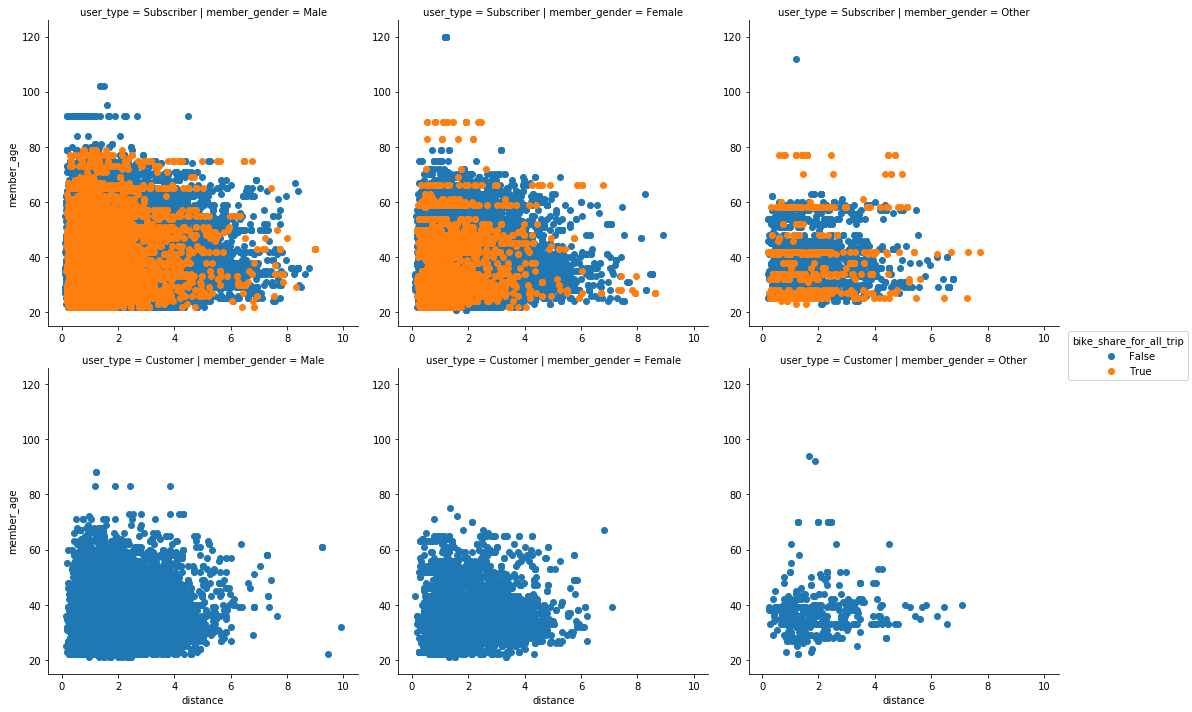

In [53]:
g = sb.FacetGrid(data = df_fordgo_bike, row = 'user_type', col='member_gender',hue = 'bike_share_for_all_trip', size = 5)
g.map(plt.scatter, 'distance', 'member_age')
g.add_legend()

This final plots show that the `bike_share_for_all_trip` variable again has no register members in the customer category under `user_type` variable. For low-income riders who are subscriber, majority of the register members are "Male", followed by "Female" and then by "Other" in order of thier gender type. We can conclude that more male resident who are low-income rider are enrolled in the Bike Share program.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

After my analyses of distance against member_ages in the multivariate analyses by looking at the impact of other categorical  features (user_type, member_gender) and one numerical variable (time_hour). The multivariate exploration indicate that is a some sort of effect on the user_type with the distance traveled. I was evident that the subscriber users are more dominant in the system compare to customer user type. The same similarity was seen in member_gender. Majority of the rider are male in the dataset. The last interesting observation was the time_hour variable. When ploted in the multivarate exploration, It was seen that some members do take on ride during late hours around 8pm to 11 pm but not much distance was covered during this time. Longer distances are traveled by riders during 8am to 5pm in contrast to the 8pm to 11 pm.

### Were there any interesting or surprising interactions between features?

Taking a look at the FacetGrid plots of the `distance` and `member_age` with scatter plot of `user_type`, `member_gender` and `bike_share_for_all_trip` variables, it was interesting to see how this  variable interacts and that no member that is of customer user_type was enrolled in the Bike Share program.

## Conclusions

As I conclude this section of the data visualization and communication, I want to summarise some of the main findings in the exploration. Firstly, I started with the univariate analyses to visualised the distribution of the variables of interest using a histogram, I then went further to bivariate analyses and it was seen that there was some sort of positive correlation between the distance and duration_sec with member_age variable in the dataset. We also saw from the visualizations using a heatmap that most member who are older, tend to travel longer distance but not during the peak periods.

Another interesting insight seen during the multiivariate analyses was that, most of the user_type who are subscriber to the system travels mostly Tuesdays and Thursdays. Although, it appears that some of the members are not registered members for low-income earner in the system. It was also observed that there are more male than female in the Ford GoBike System dataset whether for user who are subscriber or just customer.

